# Main Question:
    
What are the relationships between different dimensions of the dataset, and whether a person survived the sinking of the Titanic or not?

Specifically, I wanted to look at the effects of the following:


* class


* gender


* age


* family membership (whether a passenger had family members on board or not)

If base sizes allow I may also look into the effects of combined variables (e.g. being a female of a certain class)


# Data Wrangling/Cleaning:

I had to do the following to clean the data/get it into a usable format for the analysis I wanted to do:

* **Change column names** - This was largely just to make the data more intuitive to work with for me.


* **Remove na from age column**. I did this to get an idea of the base size I could expect for analysis based on age as some of the passengers had no entry for age. I also used it to create suitable bins to group the continuous age data by.


* **Binning age data**. I felt the need to do this to allow me to look at how people in different age brackets fared with regards to survival. Here I used the pandas `qcut` method to split the data by age into equal sized bins. This yielded the following bin definitions: `[ 0.42,  19.  ,  25.  ,  31.8 ,  41.  ,  80.  ]`. From this I could tell that the youngest in the sample was 0.42, and the oldest was 80. I decided based on these definitions to add a column to the dataframe called `age_binned`, with passengers divided as follows: `['0-18', '18-25','25-30', '30-40', '40-80']`


* I also wanted to look at family membership's effect on survival. For this I used the `groupby` function, so it wasn't necessary to actually change any of the underlying data structures.



survival rate overall
survived
0    549
1    342
dtype: int64


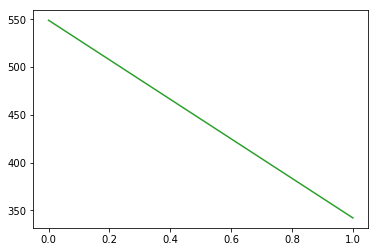


titanic se_class split
se_class
1    216
2    184
3    491
dtype: int64

titanic survival by se_class
se_class
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

titanic sex split
sex
female    314
male      577
dtype: int64

titanic survival by sex
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

titanic without null ages base: 
714

most equal equal age bin sizes
['first', 'second', 'third', 'fourth', 'fifth']
[  0.42  19.    25.    31.8   41.    80.  ]

bin size counts - seem like reasonable bases
first     164
fourth    144
fifth     142
second    137
third     127
Name: age, dtype: int64

titanic age_binned split
age_binned
0-18     139
18-25    162
25-30    108
30-40    155
40-80    150
dtype: int64

titanic survival by age_binned
age_binned
0-18     0.503597
18-25    0.333333
25-30    0.388889
30-40    0.445161
40-80    0.366667
Name: survived, dtype: float64

titanic part of family split
False    537
True     354
dtype: int64

ti

In [7]:
# Data Exploration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('./titanic-data.csv')

# rename columns
titanic_df.columns = ['passengerid', 'survived', 'se_class', 'name', 'sex', 'age', 'siblings_spouses_count', \
'parents_children_count', 'ticket', 'fare', 'cabin', 'embarcation_point']

# show initial survival rates
titanic_by_survived = titanic_df.groupby('survived')
print '\nsurvival rate overall'
print titanic_by_survived.size()
plt.plot(titanic_by_survived.size())
plt.show()

def survival_rate_by(data_frame, dimension):
    data_frame_by_dimension = data_frame.groupby(dimension)
    print '\ntitanic ' + dimension + ' split'
    print data_frame_by_dimension.size() 
    print '\ntitanic survival by ' + dimension
    print data_frame_by_dimension['survived'].mean()
    return data_frame_by_dimension['survived'].mean()

# se class survival basic analysis
survival_rate_by(titanic_df, 'se_class')

# gender survival basic analysis
survival_rate_by(titanic_df, 'sex')

# age survival basic analysis
# remove null values from age. Base is still 714. Seems reasonable for analysis
titanic_without_null_ages = titanic_df.dropna(subset=['age'])
print '\ntitanic without null ages base: '
print len(titanic_without_null_ages )

# used this to figure out a good split for bins. Those returned by qcut are [ 0.42,  19.  ,  25.  ,  31.8 ,  41.  ,  80.  ]
titanic_age_equal_bin_labels = ['first', 'second', 'third', 'fourth', 'fifth']
titanic_age_equal_bins = pd.qcut(titanic_without_null_ages['age'], q=5, retbins=True, labels=titanic_age_equal_bin_labels)
print '\nmost equal equal age bin sizes'
print titanic_age_equal_bin_labels
print titanic_age_equal_bins[1]
titanic_age_equal_bins = pd.qcut(titanic_without_null_ages['age'], q=5, labels=titanic_age_equal_bin_labels)
print '\nbin size counts - seem like reasonable bases'
print titanic_age_equal_bins.value_counts()

# split ages into sensible bins based on above
titanic_age_bins = [0, 18, 25, 30, 40, 80]
titanic_age_bin_labels = ['0-18', '18-25','25-30', '30-40', '40-80']
titanic_df['age_binned'] = pd.cut(titanic_without_null_ages['age'], titanic_age_bins, labels=titanic_age_bin_labels)

titanic_by_age = titanic_df.groupby('age_binned')
survival_rate_by(titanic_df, 'age_binned')

# look at impact of being part of a family on survival
def part_of_family(index):
    if titanic_df.iloc[index]['siblings_spouses_count'] > 0 or titanic_df.iloc[index]['parents_children_count'] > 0:
        return True
    return False

titanic_by_part_of_family = titanic_df.groupby(part_of_family)
print '\ntitanic part of family split'
print titanic_by_part_of_family.size()
print '\ntitanic survival by part of family'
print titanic_by_part_of_family['survived'].mean()

# Data Exploration

The code above shows how I explored the data, and shows the outputs of the analysis in tabular form. Hopefully the comments should be enough to give an indication of why I did things and what I was thinking. Below, I will use the data above to create plots and visualisations, to further support my eventual conclusions.